In [102]:
from sklearn.cluster import KMeans

In [103]:
k=5
kmeans = KMeans(n_clusters=k)

In [104]:
from sklearn.datasets import load_iris

In [105]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [106]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

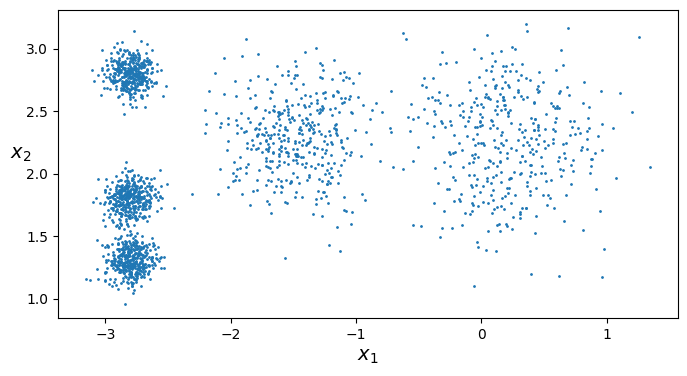

In [107]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [108]:
y_pred = kmeans.fit_predict(X)

In [109]:
y_pred

array([2, 2, 4, ..., 0, 4, 2], dtype=int32)

In [110]:
kmeans.cluster_centers_

array([[-2.7943747 ,  2.79740645],
       [-0.74504819,  2.5133685 ],
       [-2.80301764,  1.5512747 ],
       [-1.53198802,  2.25010959],
       [ 0.27582313,  2.23090237]])

In [111]:
kmeans.labels_

array([2, 2, 4, ..., 0, 4, 2], dtype=int32)

In [112]:
kmeans.inertia_

236.81538098658362

In [113]:
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(X)

4.85 ms ± 173 μs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [114]:
%timeit -n 50 KMeans(algorithm="lloyd", random_state=42).fit(X)

4.97 ms ± 192 μs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [115]:
from sklearn.cluster import MiniBatchKMeans

In [116]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [117]:
minibatch_kmeans.inertia_

211.6594510571261

In [118]:
from sklearn.metrics import silhouette_score

In [119]:
silhouette_score(X, kmeans.labels_)

np.float64(0.6224705246272877)

In [120]:
from matplotlib.image import imread
import os
import urllib
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


In [121]:
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x2137f15ef90>)

In [122]:
image = imread(os.path.join("images", "unsupervised_learning", "ladybug.png"))

In [123]:
image.shape

(533, 800, 3)

In [136]:
X = image.reshape(-1, 3)

kmeans = KMeans(n_clusters=8).fit(X)
print(kmeans.cluster_centers_, kmeans.labels_)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
#print(segmented_img.shape, segmented_img[:5])
segmented_img = segmented_image.reshape(image.shape)

[[0.01758373 0.0962131  0.00519562]
 [0.9726535  0.89998925 0.02549647]
 [0.27460286 0.44050103 0.08658232]
 [0.63250613 0.6462145  0.41569784]
 [0.1653299  0.3294089  0.03411263]
 [0.75705457 0.52003825 0.06051294]
 [0.398823   0.5463738  0.19446829]
 [0.0720093  0.21675524 0.01179156]] [0 0 0 ... 7 7 7]


In [131]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

<Figure size 1000x500 with 0 Axes>

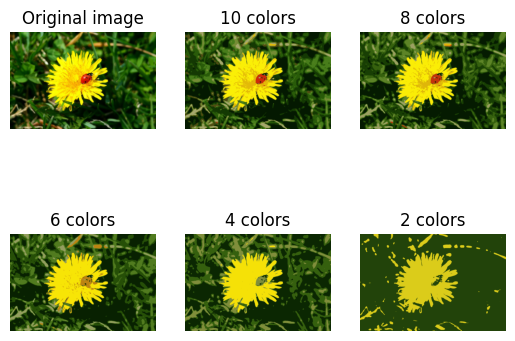

In [132]:
plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

In [127]:
X[:5]

array([[0.09803922, 0.11372549, 0.00784314],
       [0.09411765, 0.10980392, 0.00392157],
       [0.09411765, 0.11372549, 0.        ],
       [0.10196079, 0.11372549, 0.        ],
       [0.09803922, 0.11372549, 0.00784314]], dtype=float32)

In [137]:
from sklearn.datasets import load_digits

In [138]:
X_digits, y_digits = load_digits(return_X_y=True)

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
log = LogisticRegression()

In [145]:
log.fit(X_train, y_train)

C:\Users\guiso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [146]:
log.score(X_test, y_test)

0.9711111111111111

In [188]:
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

In [189]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", OneVsRestClassifier(LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 OneVsRestClassifier(estimator=LogisticRegression(max_iter=5000,
                                                                  random_state=42)))])

In [190]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 OneVsRestClassifier(estimator=LogisticRegression(max_iter=5000,
                                                                  random_state=42)))])

In [200]:
pipeline.score(X_test, y_test)

0.9822222222222222

In [192]:
from sklearn.model_selection import GridSearchCV

In [193]:
params = dict(kmeans__n_clusters=range(2,100))

In [194]:
grid = GridSearchCV(pipeline, params, cv=3, verbose=2)

In [195]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        OneVsRestClassifier(estimator=LogisticRegression(max_iter=5000,
                                                                                         random_state=42)))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [196]:
grid.best_params_

{'kmeans__n_clusters': 64}

In [201]:
grid.score(X_test, y_test)

0.9844444444444445

In [202]:
n_labeled = 50

In [204]:
log = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)

In [207]:
log.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=5000, random_state=42)

In [210]:
log.score(X_test, y_test)

0.8577777777777778

In [237]:
k=50 
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

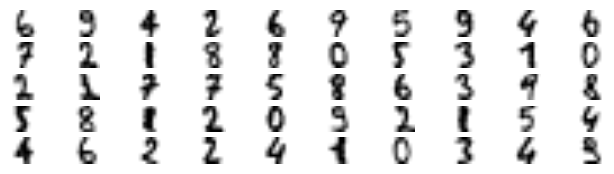

In [238]:
plt.figure(figsize=(8, 2))
for i, digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, i + 1)
    plt.imshow(digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()


In [239]:
y_train[representative_digit_idx]

array([6, 9, 4, 2, 6, 9, 5, 9, 4, 6, 7, 2, 1, 8, 8, 0, 5, 3, 1, 0, 2, 1,
       7, 7, 5, 8, 6, 3, 9, 8, 5, 8, 1, 2, 0, 9, 2, 1, 5, 4, 4, 6, 2, 2,
       4, 1, 0, 3, 4, 9])

In [240]:
y_representative_digits = np.array([6, 9, 4, 2, 6, 9, 5, 9, 4, 6, 7, 2, 1, 8, 8, 0, 5, 3, 1, 0, 2, 1,
       7, 7, 5, 8, 6, 3, 9, 8, 5, 8, 1, 2, 0, 9, 2, 1, 5, 4, 4, 6, 2, 2,
       4, 1, 0, 3, 4, 9])

In [259]:
print(kmeans.labels_[:100])

[22 35 31 38 13 23 33  1 28 26 47 42 41 39 31 15 30 29 12  3 37 35 30  7
 44 22 25 26 28 30 27 19  6 24 45 30 47 41 15 17 13 22 20 37 27  3 23 39
  8 46 17 17 25 22  4 17 20  0 18 14 11 47 34  6  7 17 44 47 26 43 34  5
 35 46 30 39 26 28 38  5 27 38 40 19 38 28 49 41 16 29  7  7 23 41 22 45
 19 37 20 16]


In [241]:
log.fit(X_representative_digits, y_representative_digits)

LogisticRegression(max_iter=5000, random_state=42)

In [242]:
log.score(X_test, y_test)

0.92

In [246]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [260]:
y_train_propagated[:100]

array([7, 9, 8, 5, 8, 7, 2, 9, 9, 6, 3, 2, 6, 4, 8, 0, 5, 8, 1, 2, 1, 9,
       5, 9, 4, 7, 8, 6, 9, 5, 3, 0, 5, 5, 1, 5, 3, 6, 0, 3, 8, 7, 2, 1,
       3, 2, 7, 4, 4, 0, 3, 3, 8, 7, 6, 3, 2, 6, 1, 8, 2, 3, 0, 5, 9, 3,
       4, 3, 6, 2, 0, 9, 9, 0, 5, 4, 6, 9, 5, 9, 3, 5, 4, 0, 5, 9, 9, 6,
       5, 8, 9, 9, 7, 6, 7, 1, 0, 1, 2, 5], dtype=int32)

In [261]:
log.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, random_state=42)

In [262]:
log.score(X_test, y_test)

0.9444444444444444

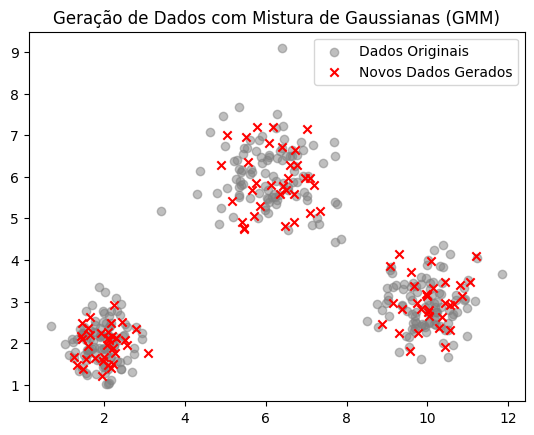

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Passo 1: Criar dados sintéticos (três clusters)
np.random.seed(42)
X1 = np.random.normal(loc=[2, 2], scale=0.5, size=(100, 2))
X2 = np.random.normal(loc=[6, 6], scale=0.8, size=(100, 2))
X3 = np.random.normal(loc=[10, 3], scale=0.6, size=(100, 2))
X = np.vstack([X1, X2, X3])  # Unindo os clusters

# Passo 2: Treinar o modelo GMM com 3 componentes
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Passo 3: Gerar novos dados amostrando da distribuição aprendida
new_samples, _ = gmm.sample(100)  # Gerando 100 novos pontos

# Visualização
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5, label="Dados Originais")
plt.scatter(new_samples[:, 0], new_samples[:, 1], c='red', marker='x', label="Novos Dados Gerados")
plt.legend()
plt.title("Geração de Dados com Mistura de Gaussianas (GMM)")
plt.show()
